<a href="https://colab.research.google.com/github/hansjang/Py_Radar/blob/main/%EB%8D%B0%EC%8B%B8%EB%9D%BC%EB%A9%B4Part7_P291.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hansjang/Py_Radar.git

import shutil
shutil.move('Py_Radar/data', '/content/data')

# 폴더와 그 안의 모든 파일을 삭제
# !rm -rf /content/Py_Radar
# !rm -rf /content/data

Cloning into 'Py_Radar'...
remote: Enumerating objects: 221, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 221 (delta 24), reused 0 (delta 0), pack-reused 166 (from 1)
Receiving objects: 100% (221/221), 7.60 MiB | 15.11 MiB/s, done.
Resolving deltas: 100% (110/110), done.


'/content/data'

## 1.One Sample t-test



In [3]:
import numpy as np
import pandas as pd
cats = pd.read_csv('/content/data/cats.csv')
display(cats.head())
display(cats.info())

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


None

##  Shapiro test : 정규성 검정

In [4]:
import scipy.stats as stats
from scipy.stats import shapiro
mu = 2.6
shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518791269479144, pvalue=6.730857622701013e-05)

pvalue가 유의수준 0.05보다 작으므로 '데이터가 정규분포를 따른다'는 귀무가설을 기각한다. 즉, cats데이터의 Bwt 변수는 정규분포를 따르지 않는다. 데이터가 정규분포를 따르지 않으므로 wilcoxon 테스트로 t-test를 진행한다. 만약, 정규분포를 따른다면 stats.ttest_1samp(cats.Bwt, popmean=mu)를 사용하면 된다.

In [5]:
stats.wilcoxon(cats.Bwt - mu, alternative = 'two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

Wilcoxon test 결과, pvaluesms 유의수준 0.05보다 작으므로 '고양이의 몸무게가 2.6kg이다'라는 귀무가설을 기각할 수 있다. 즉, 유의수준 0.05하에 고양이의 평균 몸무게는 2.6kg이라 할 수 없다.

In [9]:
stats.ttest_1samp(cats.Bwt, popmean=mu)

TtestResult(statistic=3.0564867998078107, pvalue=0.0026730362561723613, df=143)

In [6]:
display(cats['Bwt'].mean())

2.7236111111111114

Text(0, 0.5, 'Count')

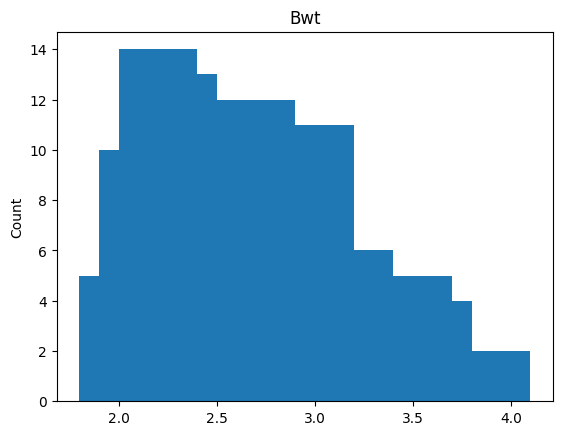

In [8]:
import matplotlib.pyplot as plt
# cats_Bwt_cnt = pd.value_counts(cats['Bwt'].values, sort = False)
cats_Bwt_cnt = pd.Series(cats['Bwt'].values).value_counts(sort=False)
width = 0.4
plt.bar(cats_Bwt_cnt.index, cats_Bwt_cnt.values, width)
plt.title('Bwt')
plt.ylabel('Count')

그래프로 시각화했을 때에도 해당 데이터는 정규성을 띄지 않음을 알 수 있으며, wilcoxon test 결과 p-value는 유의수준 0.05보다 작으므로 '고양이의 몸무게가 2.6kg이다'라는 귀무가설을 기각할 수 있다. 즉, 유의수준 0.05하에 고양이의 평균 몸무게는 2.6kg이라 할 수 없다.

## 2. Paired Sample t-test

In [10]:
# 데이터 불러오기
import numpy as np
import pandas as pd
data = {
    'before' : [7, 3, 4, 5, 2, 1, 6, 6, 5, 4],
    'after' : [8, 4, 5, 6, 2, 3, 6, 8, 6, 5]
}
data = pd.DataFrame(data)
display(data)

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [11]:
# 대응표본 t-test
stats.ttest_rel(data['after'], data['before'], alternative='greater')

TtestResult(statistic=4.743416490252569, pvalue=0.0005269356285082764, df=9)

검정결과 pvalue값이 유의수준 0.05보다 작으므로 귀무가설을 기각한다

In [12]:
data.mean()

,0
before,4.3
after,5.3


pvalue값이 유의수준보다 작으므로 '수면영양제를 복용하기 전과 후의 평균 수면시간의 차이는 통계적으로 유의하며, 영양제를 복용한 후 수면시간이 늘었다'고 할 수 있다.

## 3. Independent Sample t-test

In [14]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro

cats = pd.read_csv('/content/data/cats.csv')
# display(cats.head())
# display(cats.info())
female = cats.loc[cats.Sex == 'F', 'Bwt']
male = cats.loc[cats.Sex == 'M', 'Bwt']
# 등분산성 검정(levene test)
stats.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [16]:
# 정규성 검정
shapiro_female = shapiro(female)
shapiro_male = shapiro(male)

print(shapiro_female)
print(shapiro_male)

# 그냥 정규성을 만족한다는 가정으로 하자!!

ShapiroResult(statistic=0.8909610476638475, pvalue=0.0003754219909760795)
ShapiroResult(statistic=0.9788323948987693, pvalue=0.11896203410780715)


성별에 따른 몸무게가 등분산성을 만족하지 않으므로, equal_var = False로 독립 t-test를 진행한다.

In [7]:
stats.ttest_ind(female, male, equal_var = False)

TtestResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15, df=136.83788299625363)

검정결과 pvalue는 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 즉 수컷과 암컷 고양이의 몸무게는 차이가 있다.

In [8]:
print(female.mean())
print(male.mean())

2.359574468085107
2.8999999999999995


수컷 고양이의 몸무게가 암컷 고양이 보다 더 많다.

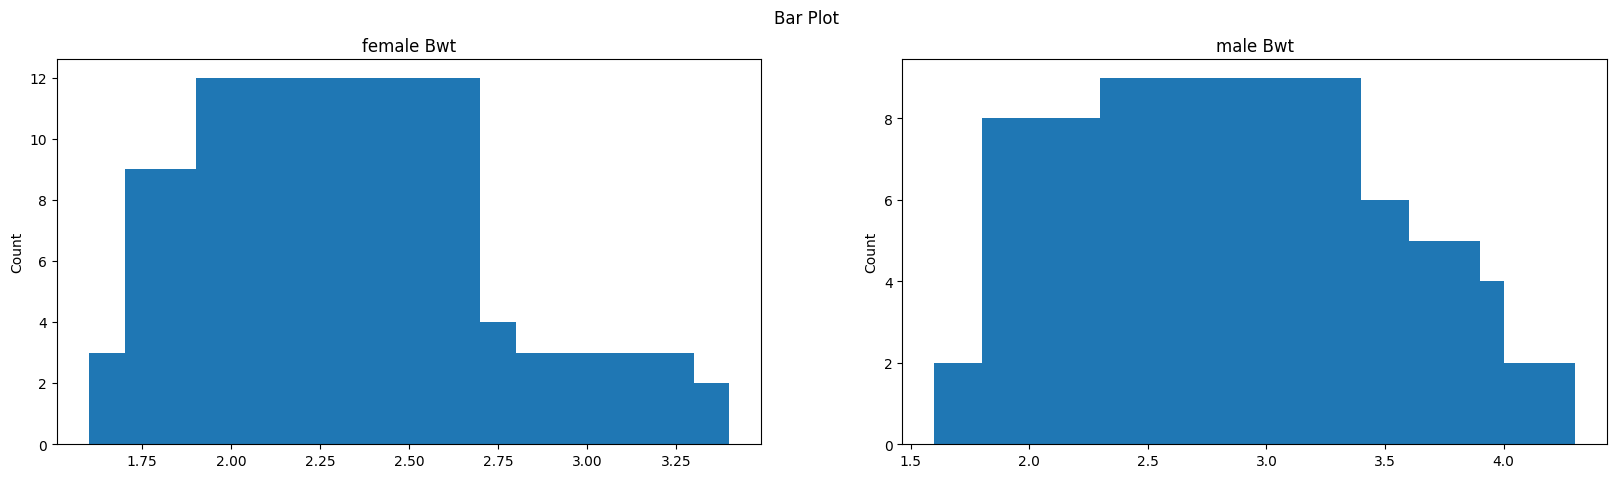

In [12]:
# 그래프 시각화
import matplotlib.pyplot as plt
female_Bwt_cnt = pd.Series(female.values).value_counts(sort = False)
male_Bwt_cnt = pd.Series(male.values).value_counts(sort = False)
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Bar Plot')
width = 0.4
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('female Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)
axs[1].set_title('male Bwt')
axs[1].set_ylabel('Count')
plt.show()